# Análisis de Medidas de Tendencia Central

La media aritmética se define como la suma de N elementos dividida entre N. Tiene el inconveniente de que es muy susceptible a valores extremos.

La mediana es el valor que dentro del conjunto de datos es menor que el 50% de los datos y mayor que el 50% restante.

La moda es el valor más repetido (solo aplicable a variables discretas).



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Anxiety_training.csv')

In [3]:
df

,Sujeto,BAI PRE,BAI POST
0,1,19,2
1,2,7,5
2,3,13,1
3,4,18,12
4,5,23,13
5,6,24,14
6,7,14,2
7,8,4,6
8,9,4,4
9,10,7,5


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


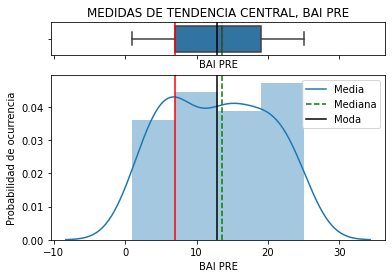

Media= 12.833333333333334
Mediana= 13.5
Moda= 7


In [4]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
Media=df['BAI PRE'].mean()
Mediana=df['BAI PRE'].median()
Moda=df['BAI PRE'].mode().tolist()[0]

sns.boxplot(df["BAI PRE"], ax=ax_box)
ax_box.axvline(Mediana, color='g', linestyle='--')
ax_box.axvline(Media, color='k', linestyle='-')
ax_box.axvline(Moda, color='r', linestyle='-')

sns.distplot(df["BAI PRE"], ax=ax_hist)
ax_hist.axvline(Mediana, color='g', linestyle='--')
ax_hist.axvline(Media, color='k', linestyle='-')
ax_hist.axvline(Moda, color='r', linestyle='-')

plt.legend({'Media':Media,'Mediana':Mediana,'Moda':Moda})

# Add some description to the plot
ax_box.set(title="MEDIDAS DE TENDENCIA CENTRAL, BAI PRE")
ax_hist.set(ylabel="Probabilidad de ocurrencia")
ax_hist.set(xlabel="BAI PRE")

plt.show()
print('Media=', Media)
print('Mediana=',  Mediana)
print('Moda=', Moda)

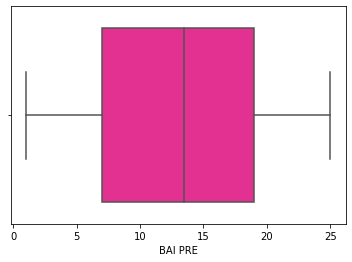

In [5]:
colours=["#ff1493"]
sns.set_palette(sns.color_palette(colours))
plot_edad=sns.boxplot(x=df["BAI PRE"])

In [6]:
esc_total=df['BAI PRE']
from scipy.stats import shapiro

data = esc_total
# Prueba de Shapiro-Wilk
stat, p = shapiro(data)
print('Estadisticos=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p >= alpha:
   print('La muestra parece Gaussiana o Normal (no se rechaza la hipótesis nula H0)')
else:
   print('La muestra no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)')

Estadisticos=0.948, p=0.012
La muestra no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)


# Medidas de dispersión

La desviación estándar mide la dispersión de los datos respecto a la media. Se trata de la raíz cuadrada de la varianza, que en sí misma no es una medida de dispersión. Para calcular la desviación típica usamos std y var para la varianza. 

In [7]:
std = df["BAI PRE"].std(ddof=0)
var = df["BAI PRE"].var(ddof=0)
print(std)
print(var)

6.976548016191262
48.67222222222223


# Medidas de posición: : cuartiles y percentiles

El concepto es igual al de mediana, a excepción de que aquí la división ya no es en el 50%. El 25% de las observaciones es menor que el primer cuartil. Los cuartiles abarcan el 25%, 50% y 75% de las observaciones. Los percentiles son una generalización con cualquier porcentaje.

Ejemplo: ¿Cuál es la edad que tiene como mínimo el 10%  de toda la muestra?

Este enunciado nos pide calcular el percentil 90.

Usamos quantile y el porcentaje.

In [8]:
p90 = df["BAI PRE"].quantile(0.9)
print(p90)

23.0
